In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from collections import deque

from controllers.game_controller import GameController
from drl.agent import DRLAgent
from models.players.drl_player import DRLPlayer

In [3]:
def init_train(game_controller, drl_player, model_path=None, 
                                eps_start=1.0, eps_end=0.01, eps_decay=0.9999):
        n_episodes = 10000
        checkpoint_each = 500
        print_each = 50
        train_args = {
            'eps': eps_start,
            'eps_end': eps_end,
            'eps_decay': eps_decay
        }
        
        game_controller.view.update_view(print_function=lambda *args, **kwargs: 0)
        game_controller._load_train(drl_player)
        drl_player.update_epsilon(eps_start)

        scores = []
        scores_window = deque(maxlen=100)
        try:
            start = time.time()
            for i in range(1, n_episodes+1):
                score = game_controller._run_episode(train_mode=True, train_args=train_args)
                game_controller.game.reset()
                scores.append(score)
                scores_window.append(score)

                if i%print_each == 0:
                    avg_score = np.mean(scores_window)
                    print("\rEpisode #{:4d}  |  "
                        "Score: {:+5.2f}  |  "
                        "Avg. Score: {:+5.2f}  |  "
                        "Epsilon: {:5.3f}  |  "
                        "Time elapsed: {:.2f}s".format(i, score, avg_score, train_args['eps'], time.time() - start)
                    )
                if i%checkpoint_each == 0:
                    drl_player.agent.save_model()
                    print('Checkpoint saved!')
        except KeyboardInterrupt:
            pass

        # save model after all episodes
        drl_player.agent.save_model(model_path)
        print('Model saved!')


        return scores

In [5]:
def plot_scores(scores):
    fig, ax = plt.subplots(figsize=(18,6))
    ax.plot(scores)
    pd.Series(scores).rolling(100, 1).mean().plot(ax=ax, label='MA(100)')
    plt.show()

In [42]:
controller = GameController()
drl_agent = DRLAgent(
    state_size=controller.game.N*controller.game.N+2,
    bid_action_size=1,
    board_action_size=controller.game.N*controller.game.N,
    seed=None,
    checkpoint_path='../checkpoints/checkpoint.pt'
)

[[-1, -1, -1], [-1, -1, -1], [-1, -1, -1]]


Episode #  50  |  Score: +1.00  |  Avg. Score: +0.36  |  Epsilon: 0.965  |  Time elapsed: 1.39s
Episode # 100  |  Score: +1.00  |  Avg. Score: +0.37  |  Epsilon: 0.930  |  Time elapsed: 1.79s
Episode # 150  |  Score: -1.00  |  Avg. Score: +0.17  |  Epsilon: 0.896  |  Time elapsed: 6.98s
Episode # 200  |  Score: -1.00  |  Avg. Score: -0.41  |  Epsilon: 0.864  |  Time elapsed: 17.32s
Episode # 250  |  Score: -1.00  |  Avg. Score: -0.81  |  Epsilon: 0.833  |  Time elapsed: 27.01s
Episode # 300  |  Score: -1.00  |  Avg. Score: -0.84  |  Epsilon: 0.806  |  Time elapsed: 36.03s
Episode # 350  |  Score: -1.00  |  Avg. Score: -0.81  |  Epsilon: 0.779  |  Time elapsed: 45.45s
Episode # 400  |  Score: -1.00  |  Avg. Score: -0.72  |  Epsilon: 0.753  |  Time elapsed: 55.19s
Episode # 450  |  Score: +1.00  |  Avg. Score: -0.57  |  Epsilon: 0.728  |  Time elapsed: 64.20s
Episode # 500  |  Score: -1.00  |  Avg. Score: -0.59  |  Epsilon: 0.702  |  Time elapsed: 74.32s
Checkpoint saved!
Episode # 550  

Episode #4200  |  Score: -1.00  |  Avg. Score: -0.17  |  Epsilon: 0.052  |  Time elapsed: 824.60s
Episode #4250  |  Score: -1.00  |  Avg. Score: -0.30  |  Epsilon: 0.050  |  Time elapsed: 835.04s
Episode #4300  |  Score: +1.00  |  Avg. Score: -0.41  |  Epsilon: 0.048  |  Time elapsed: 844.95s
Episode #4350  |  Score: +0.00  |  Avg. Score: -0.37  |  Epsilon: 0.047  |  Time elapsed: 855.25s
Episode #4400  |  Score: +0.00  |  Avg. Score: -0.29  |  Epsilon: 0.045  |  Time elapsed: 865.18s
Episode #4450  |  Score: +1.00  |  Avg. Score: -0.29  |  Epsilon: 0.043  |  Time elapsed: 875.48s
Episode #4500  |  Score: -1.00  |  Avg. Score: -0.19  |  Epsilon: 0.042  |  Time elapsed: 885.94s
Checkpoint saved!
Episode #4550  |  Score: -1.00  |  Avg. Score: -0.21  |  Epsilon: 0.041  |  Time elapsed: 895.87s
Episode #4600  |  Score: +0.00  |  Avg. Score: -0.37  |  Epsilon: 0.039  |  Time elapsed: 905.57s
Episode #4650  |  Score: +1.00  |  Avg. Score: -0.44  |  Epsilon: 0.038  |  Time elapsed: 915.29s
Ep

Episode #8300  |  Score: +1.00  |  Avg. Score: -0.18  |  Epsilon: 0.010  |  Time elapsed: 1660.95s
Episode #8350  |  Score: +1.00  |  Avg. Score: -0.10  |  Epsilon: 0.010  |  Time elapsed: 1671.50s
Episode #8400  |  Score: -1.00  |  Avg. Score: -0.16  |  Epsilon: 0.010  |  Time elapsed: 1681.93s
Episode #8450  |  Score: +1.00  |  Avg. Score: -0.31  |  Epsilon: 0.010  |  Time elapsed: 1691.64s
Episode #8500  |  Score: -1.00  |  Avg. Score: -0.35  |  Epsilon: 0.010  |  Time elapsed: 1701.94s
Checkpoint saved!
Episode #8550  |  Score: -1.00  |  Avg. Score: -0.20  |  Epsilon: 0.010  |  Time elapsed: 1712.68s
Episode #8600  |  Score: -1.00  |  Avg. Score: -0.26  |  Epsilon: 0.010  |  Time elapsed: 1723.17s
Episode #8650  |  Score: +1.00  |  Avg. Score: -0.38  |  Epsilon: 0.010  |  Time elapsed: 1733.10s
Episode #8700  |  Score: -1.00  |  Avg. Score: -0.32  |  Epsilon: 0.010  |  Time elapsed: 1742.89s
Episode #8750  |  Score: -1.00  |  Avg. Score: -0.32  |  Epsilon: 0.010  |  Time elapsed: 1

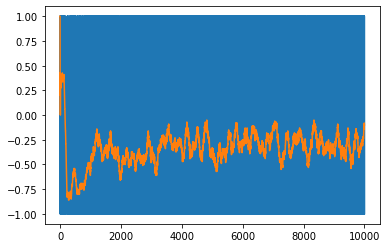

In [4]:
eps_start = 1.0
eps_end = 0.01
eps_decay = 0.9999
drl_player = DRLPlayer(0, controller.game, drl_agent, train_mode=True)
scores = init_train(controller, drl_player, model_path='../checkpoints/model.pt',
                   eps_start=eps_start, eps_end=eps_end, eps_decay=eps_decay)
plot_scores()

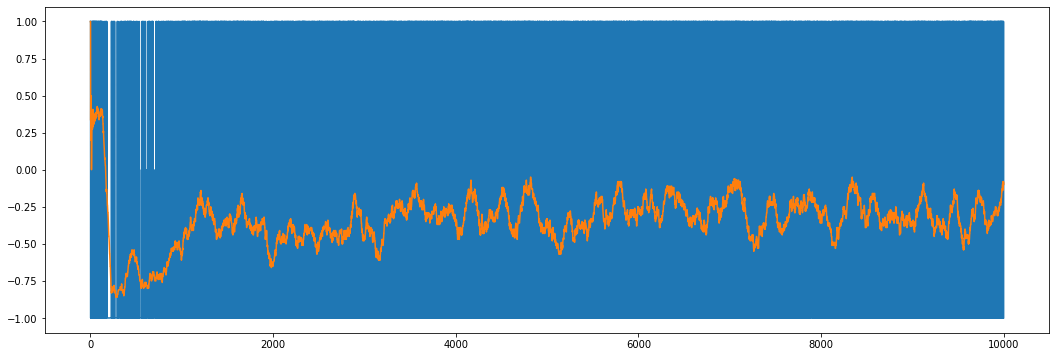

In [7]:
plot_scores(scores)

In [12]:
drl_agent.save_model('../checkpoints/model_final.pt')

In [45]:
controller.reset_game()

Select one of the following players to be player 1
0 - ./models/players\drl_player.py
1 - ./models/players\human_player.py
2 - ./models/players\random_player.py
Input desired player number: 0
Select one of the following players to be player 2
0 - ./models/players\drl_player.py
1 - ./models/players\human_player.py
2 - ./models/players\random_player.py
Input desired player number: 1
                  1 | 2 | 3 
                 ---+---+---
                  4 | 5 | 6 
                 ---+---+---
                  7 | 8 | 9 
Player 1 (X): 100           Player 2 (O): 100

Player DRLPlayer(X) bidding...
Player HumanPlayer(O) bidding...
50
Player DRLPlayer(X) bid: 98  |  Player HumanPlayer(O) bid: 50
Player DRLPlayer(X) won the bet
                  1 | 2 | 3 
                 ---+---+---
                  4 | 5 | 6 
                 ---+---+---
                  X | 8 | 9 
Player 1 (X):   2           Player 2 (O): 198

Player DRLPlayer(X) bidding...
Player HumanPlayer(O) bidding...
100
Pla